In [ ]:
import pandas as pd
import numpy as np

# Path to the .txt file
file_path = 'D:/week3 data/MachineLearningRating_v3.txt'

# Load the data into a DataFrame with pipe delimiter
df = pd.read_csv(file_path, delimiter='|')

# Display the first few rows of the DataFrame
#print("Data Preview:\n", df.head())

# Display the data types of each column
data_types = df.dtypes
print("Data Types:\n", data_types)

In [7]:
# Ensure relevant columns are numeric
numeric_cols = ['TotalPremium', 'TotalClaims'] 

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values (fill with mean or drop)
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Calculate descriptive statistics for numerical features
descriptive_stats = df[numeric_cols].describe()
print("Descriptive Statistics:\n", descriptive_stats)

# Calculate variance for numerical features
variance = df[numeric_cols].var()
print("Variance:\n", variance)

# Calculate standard deviation for numerical features
std_dev = df[numeric_cols].std()
print("Standard Deviation:\n", std_dev)

Descriptive Statistics:
        TotalPremium   TotalClaims
count  1.000098e+06  1.000098e+06
mean   6.190550e+01  6.486119e+01
std    2.302845e+02  2.384075e+03
min   -7.825768e+02 -1.200241e+04
25%    0.000000e+00  0.000000e+00
50%    2.178333e+00  0.000000e+00
75%    2.192982e+01  0.000000e+00
max    6.528260e+04  3.930921e+05
Variance:
 TotalPremium    5.303096e+04
TotalClaims     5.683812e+06
dtype: float64
Standard Deviation:
 TotalPremium     230.284513
TotalClaims     2384.074695
dtype: float64


In [5]:

# Check for missing values
missing_values = df.isnull().sum()

# Display missing values
print("Missing Values:\n", missing_values)

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Display missing values with percentage
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print("Summary of Missing Values:\n", missing_summary)


Missing Values:
 UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoo

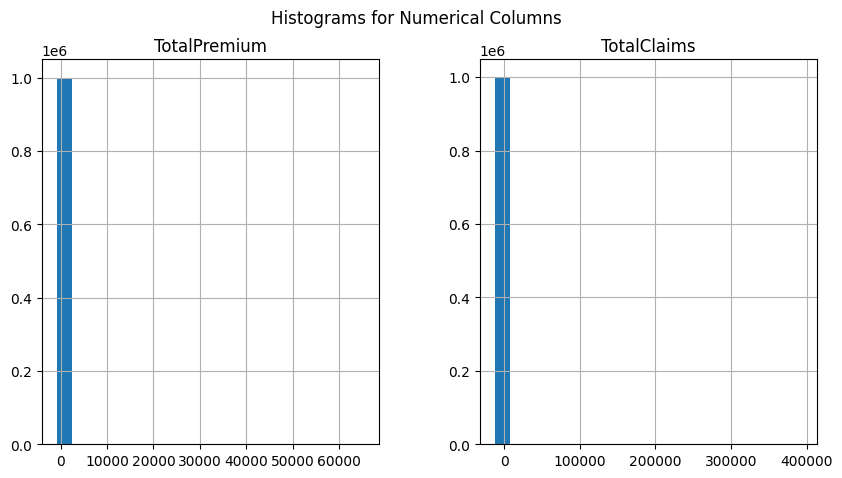

In [6]:
#import pandas as pd
import matplotlib.pyplot as plt

# Ensure relevant columns are numeric
numeric_cols = ['TotalPremium', 'TotalClaims'] 

# Plot histograms for numerical columns
df[numeric_cols].hist(bins=20, figsize=(10, 5))
plt.suptitle('Histograms for Numerical Columns')
plt.show()


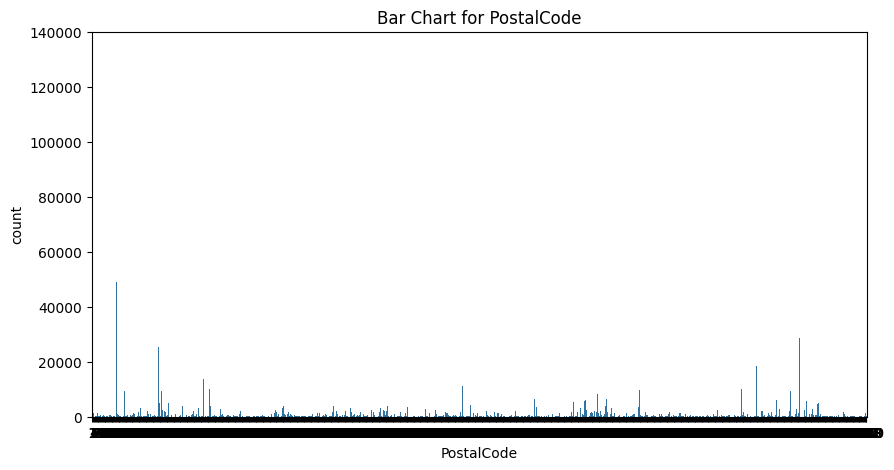

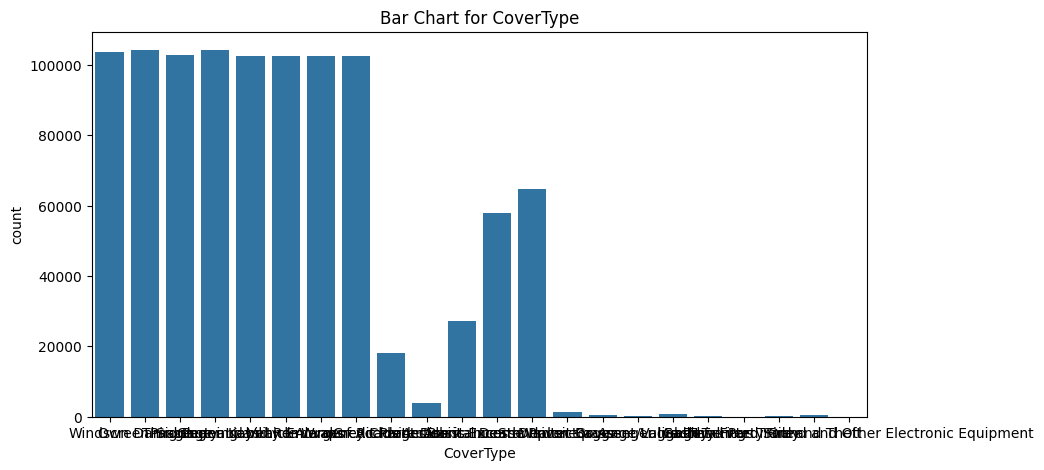

In [7]:
import seaborn as sns

# Define categorical columns
categorical_cols = ['PostalCode', 'CoverType'] 

# Plot bar charts for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Bar Chart for {col}')
    plt.show()


In [9]:

# Ensure the 'TransactionMonth' column is in datetime format
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

# Sort the DataFrame by 'TransactionMonth'
df = df.sort_values(by='TransactionMonth')

# Calculate monthly changes for 'TotalPremium' and 'TotalClaims'
df['TotalPremiumChange'] = df['TotalPremium'].diff().fillna(0)
df['TotalClaimsChange'] = df['TotalClaims'].diff().fillna(0)

# Display the first few rows of the DataFrame with new columns
print("Data with Monthly Changes:\n", df.head())

Data with Monthly Changes:
         UnderwrittenCoverID  PolicyID TransactionMonth  IsVATRegistered  \
940333                  196        38       2013-10-01            False   
963994                  203        25       2013-10-01            False   
914276                  214        24       2013-10-01            False   
811428                  219        24       2013-10-01            False   
964055                  202        25       2013-10-01            False   

       Citizenship        LegalType Title Language     Bank      AccountType  \
940333          ZA  Private company    Mr  English  Nedbank  Current account   
963994              Private company    Mr  English  Nedbank  Current account   
914276              Private company    Mr  English  Nedbank  Current account   
811428              Private company    Mr  English  Nedbank  Current account   
964055              Private company    Mr  English  Nedbank  Current account   

        ...                  CoverType  

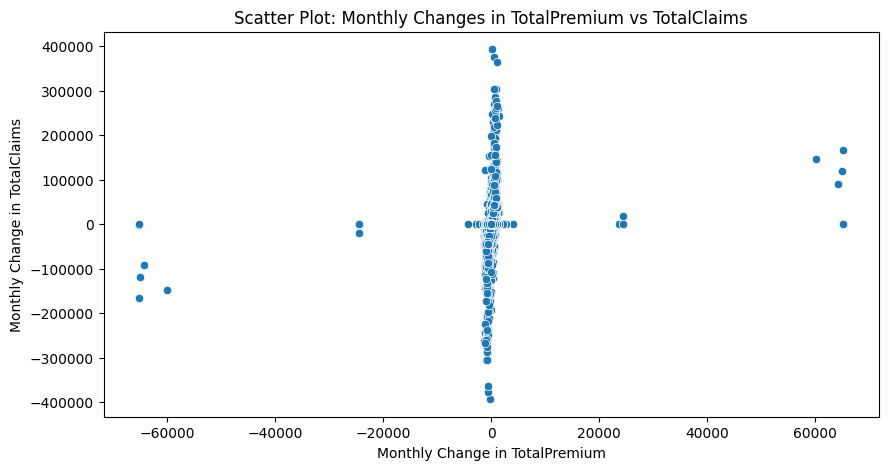

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for TotalPremiumChange vs TotalClaimsChange
plt.figure(figsize=(10, 5))
sns.scatterplot(x='TotalPremiumChange', y='TotalClaimsChange', data=df)
plt.title('Scatter Plot: Monthly Changes in TotalPremium vs TotalClaims')
plt.xlabel('Monthly Change in TotalPremium')
plt.ylabel('Monthly Change in TotalClaims')
plt.show()

Correlation Matrix:
                     TotalPremiumChange  TotalClaimsChange
TotalPremiumChange            1.000000           0.121728
TotalClaimsChange             0.121728           1.000000


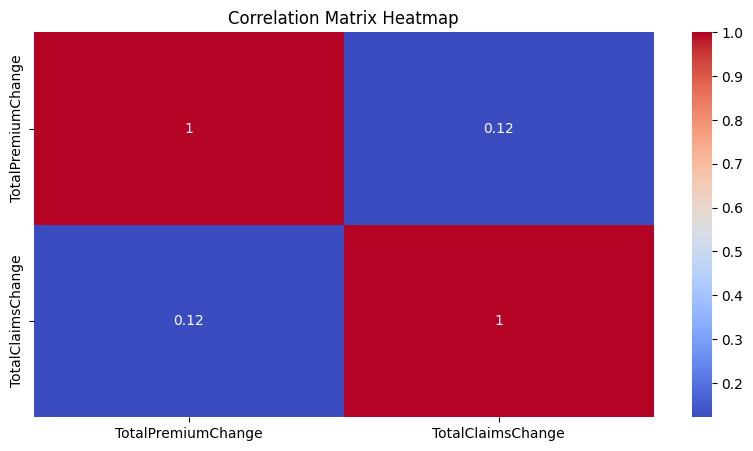

In [5]:
# Select relevant columns for correlation matrix
correlation_columns = ['TotalPremiumChange', 'TotalClaimsChange']

# Calculate the correlation matrix
corr_matrix = df[correlation_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:\n", corr_matrix)

# Heatmap for correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

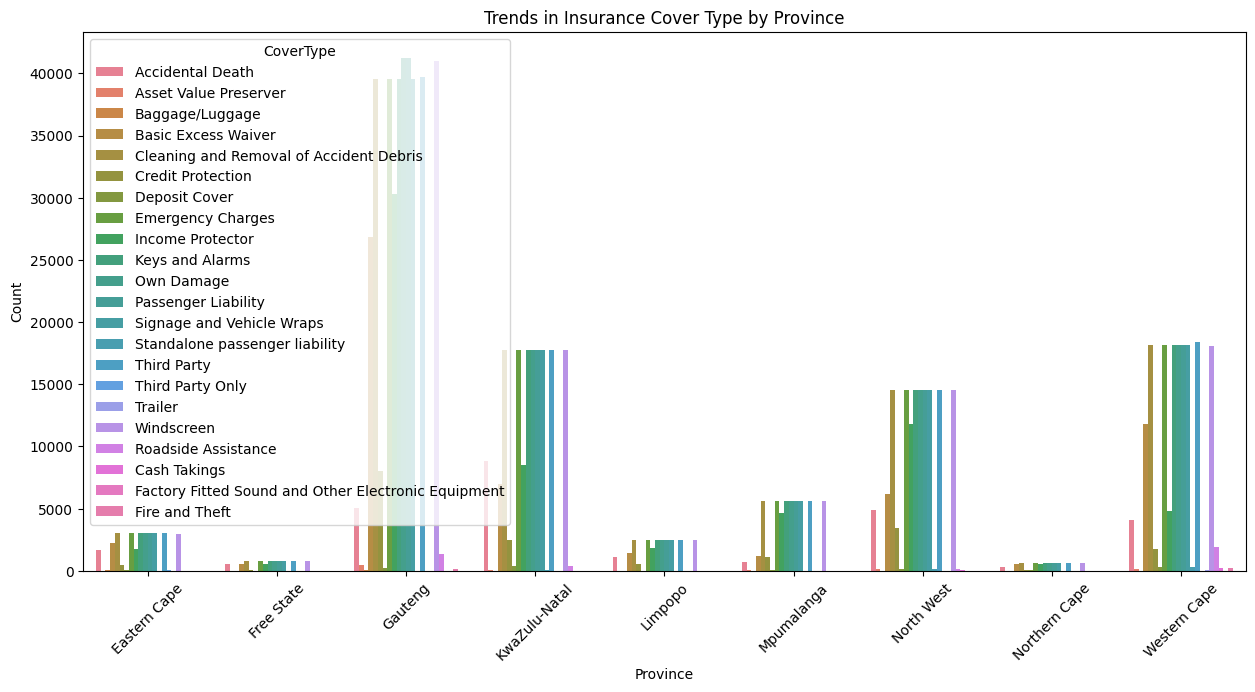

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by geographical region and cover type, then count occurrences
cover_type_trend = df.groupby(['Province', 'CoverType']).size().reset_index(name='Count')

# Plot trends in insurance cover type by geographical region
plt.figure(figsize=(15, 7))
sns.barplot(x='Province', y='Count', hue='CoverType', data=cover_type_trend)
plt.title('Trends in Insurance Cover Type by Province')
plt.xticks(rotation=45)
plt.show()

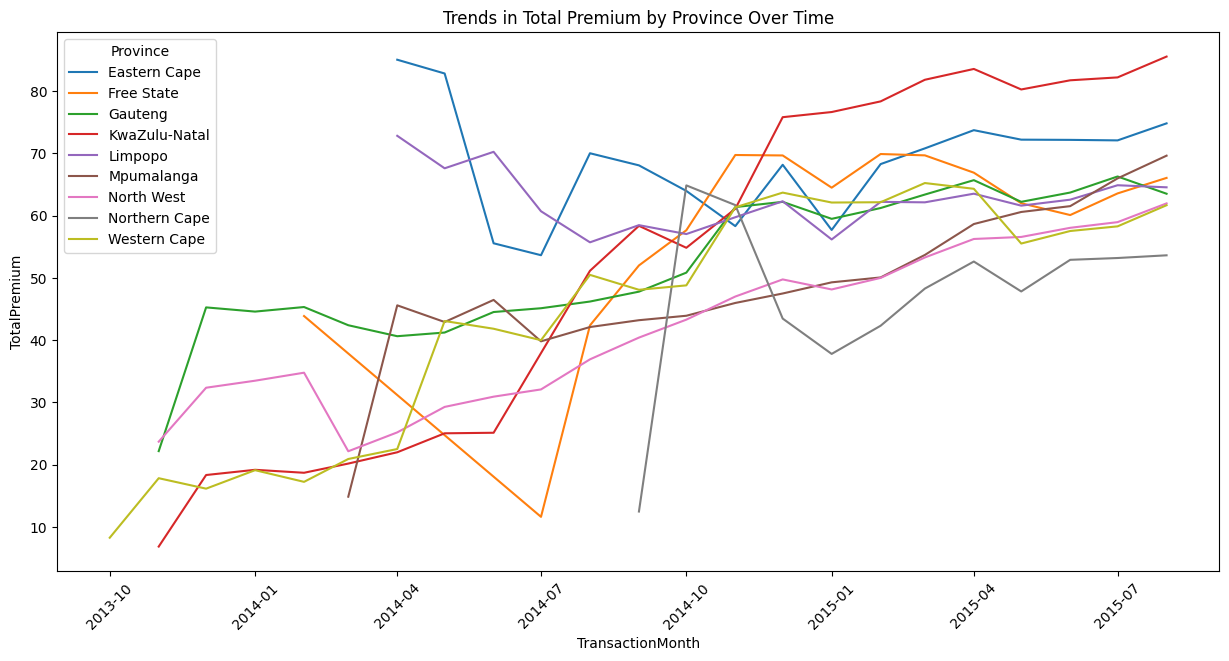

In [8]:
# Group by geographical region and calculate the average total premium
premium_trend = df.groupby(['Province', 'TransactionMonth'])['TotalPremium'].mean().reset_index()

# Plot trends in premium by geographical region
plt.figure(figsize=(15, 7))
sns.lineplot(x='TransactionMonth', y='TotalPremium', hue='Province', data=premium_trend)
plt.title('Trends in Total Premium by Province Over Time')
plt.xticks(rotation=45)
plt.show()

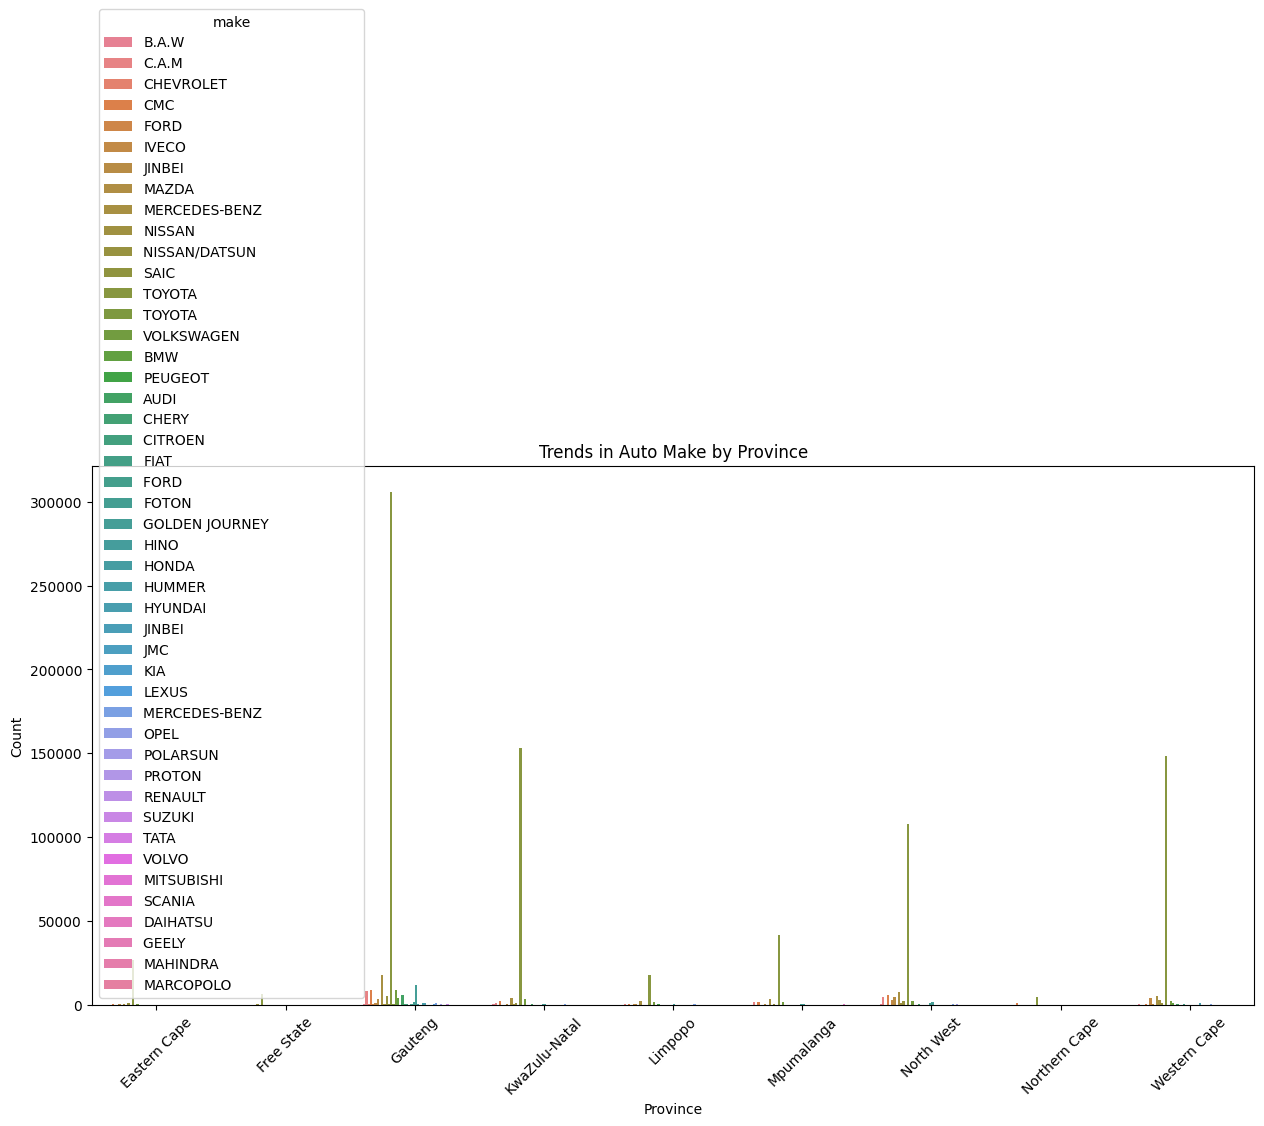

In [9]:
# Group by geographical region and auto make, then count occurrences
auto_make_trend = df.groupby(['Province', 'make']).size().reset_index(name='Count')

# Plot trends in auto make by geographical region
plt.figure(figsize=(15, 7))
sns.barplot(x='Province', y='Count', hue='make', data=auto_make_trend)
plt.title('Trends in Auto Make by Province')
plt.xticks(rotation=45)
plt.show()

Create Box Plots for Outlier Detection

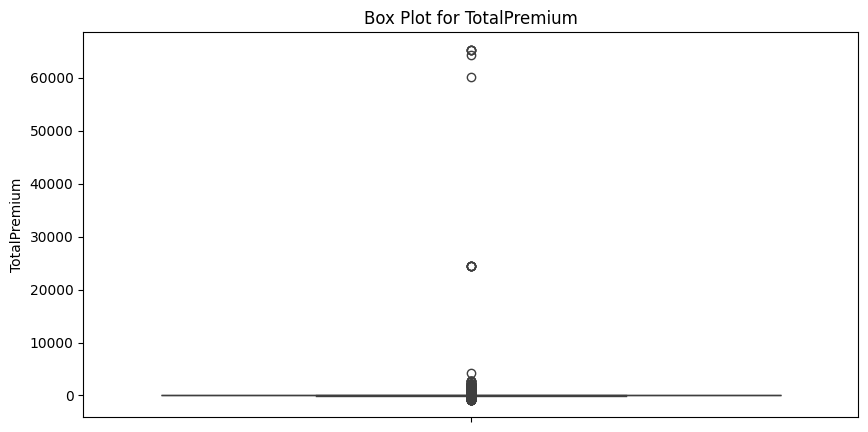

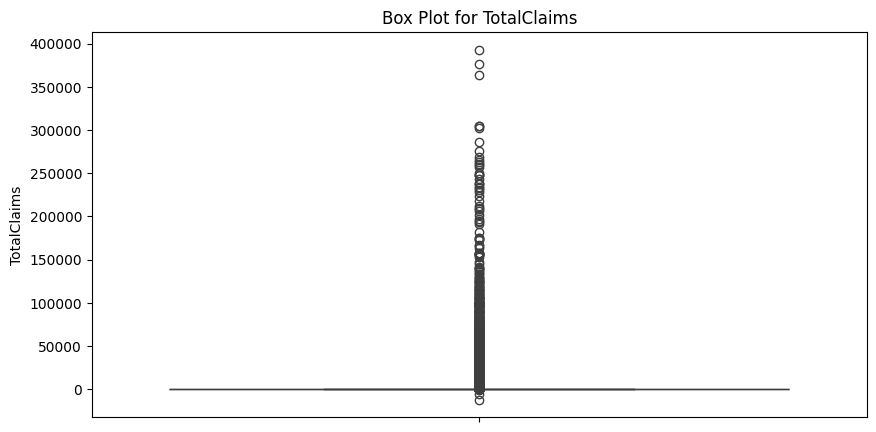

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns for outlier detection
numeric_cols = ['TotalPremium', 'TotalClaims'] 

# Create box plots for numerical columns
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot for {col}')
    plt.show()

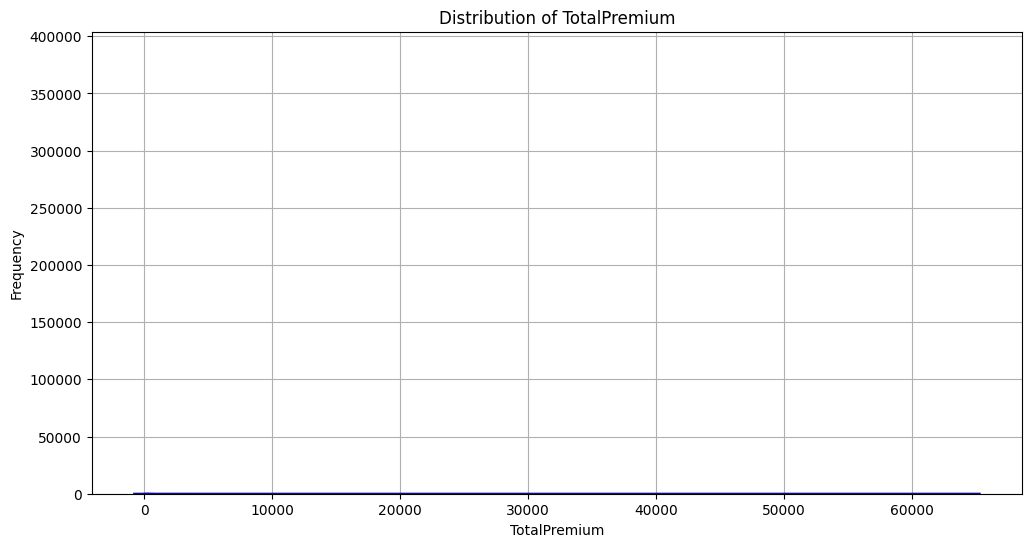

In [10]:

plt.figure(figsize=(12, 6))
sns.histplot(df['TotalPremium'], kde=True, color='blue')
plt.title('Distribution of TotalPremium')
plt.xlabel('TotalPremium')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

c:\Users\Robel\.ebcli-virtual-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


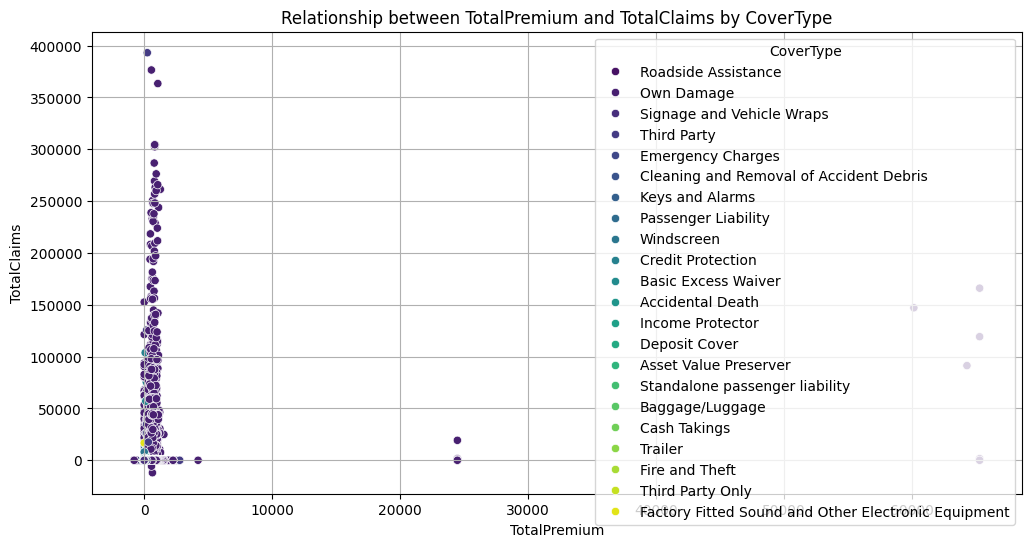

In [11]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', data=df, hue='CoverType', palette='viridis')
plt.title('Relationship between TotalPremium and TotalClaims by CoverType')
plt.xlabel('TotalPremium')
plt.ylabel('TotalClaims')
plt.legend(title='CoverType')
plt.grid(True)
plt.show()

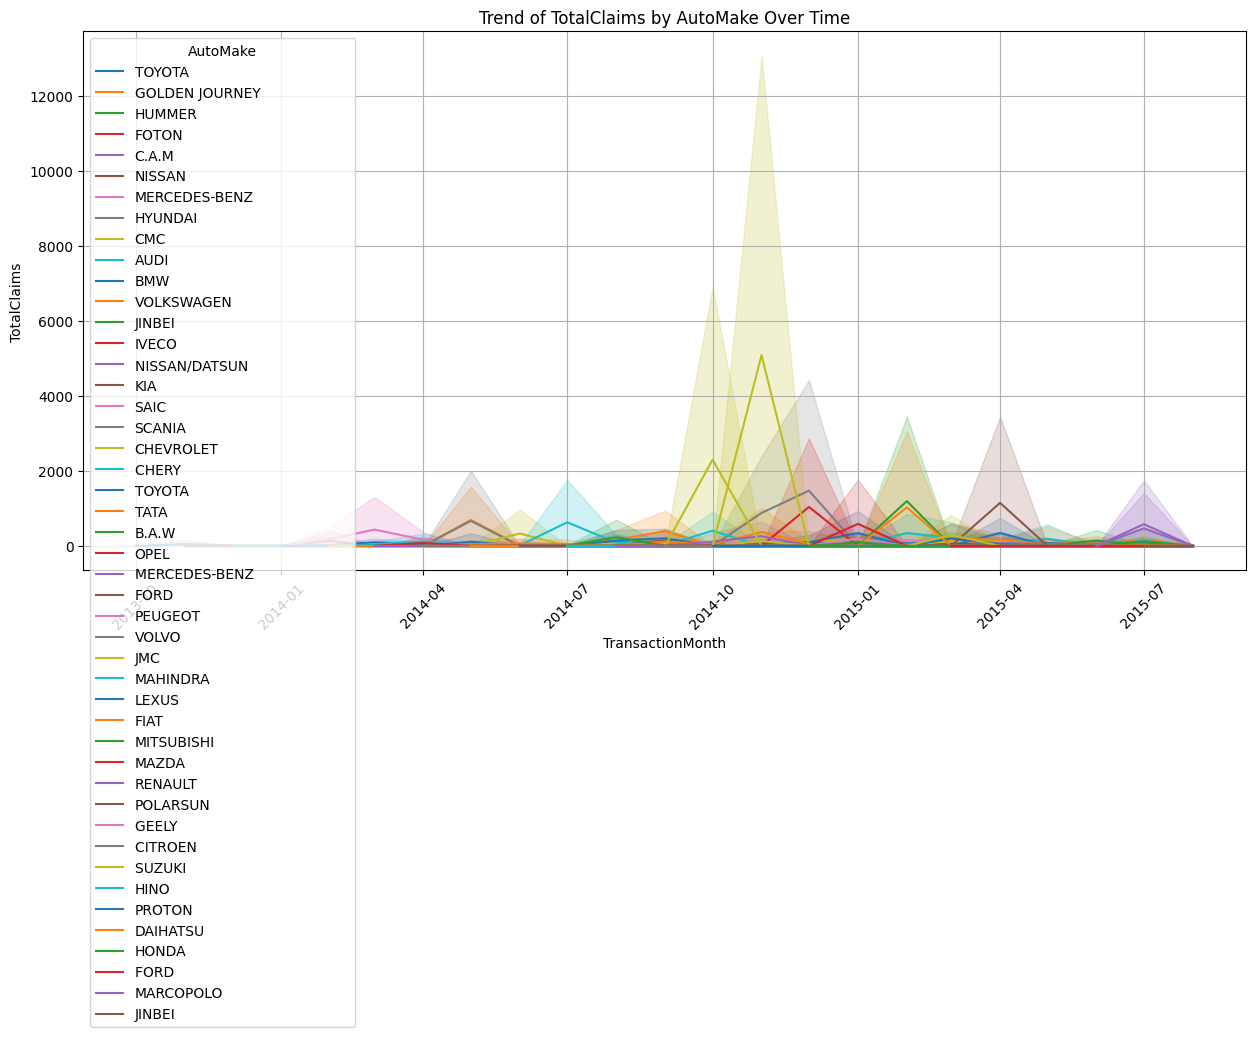

In [12]:
plt.figure(figsize=(15, 7))
sns.lineplot(x='TransactionMonth', y='TotalClaims', hue='make', data=df, palette='tab10')
plt.title('Trend of TotalClaims by AutoMake Over Time')
plt.xlabel('TransactionMonth')
plt.ylabel('TotalClaims')
plt.xticks(rotation=45)
plt.legend(title='AutoMake')
plt.grid(True)
plt.show()

In [15]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in c:\users\robel\.ebcli-virtual-env\lib\site-packages (2.2.3)




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
